<a href="https://colab.research.google.com/github/jithamanyu001/CV/blob/main/Mediapipe_thingy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 36.8 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires flatbuffers<2,>=1.12, but you have flatbuffers 23.1.4 which is incompatible.


In [3]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_objectron = mp.solutions.objectron

# For static images:
IMAGE_FILES = ["/content/download.jpg"]
with mp_objectron.Objectron(static_image_mode=True,
                            max_num_objects=5,
                            min_detection_confidence=0.5,
                            model_name='Cup') as objectron:
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    # Convert the BGR image to RGB and process it with MediaPipe Objectron.
    results = objectron.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw box landmarks.
    if not results.detected_objects:
      print(f'No box landmarks detected on {file}')
      continue
    print(f'Box landmarks of {file}:')
    annotated_image = image.copy()
    for detected_object in results.detected_objects:
      mp_drawing.draw_landmarks(
          annotated_image, detected_object.landmarks_2d, mp_objectron.BOX_CONNECTIONS)
      mp_drawing.draw_axis(annotated_image, detected_object.rotation,
                           detected_object.translation)
      cv2.imwrite('/tmp/annotated_image' + str(idx) + '.png', annotated_image)

Box landmarks of /content/download.jpg:


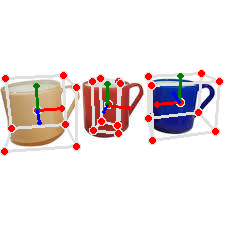

In [5]:
from google.colab.patches import cv2_imshow
cv2_imshow(cv2.imread("/tmp/annotated_image0.png"))